## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.285376 -0.671632 -1.670420  1.455268  1.317981  1.409541
1 -1.493597  0.072133  0.051451  1.611542 -0.292902 -0.257421
2  1.247664  0.592051 -1.230156 -0.955796  1.000897  0.781207
3 -0.351467  1.598173  0.319035 -0.689627  1.570517  0.725976
4  0.037315 -0.585813 -1.417253  0.815286 -0.330350  0.488050


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0040393	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9915947	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9812612	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9709429	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9624124	total: 60.3ms	remaining: 12s
5:	learn: 0.9514976	total: 60.9ms	remaining: 10.1s
6:	learn: 0.9392485	total: 61.4ms	remaining: 8.7s
7:	learn: 0.9300954	total: 62ms	remaining: 7.68s
8:	learn: 0.9214978	total: 62.4ms	remaining: 6.88s
9:	learn: 0.9112826	total: 62.9ms	remaining: 6.23s
10:	learn: 0.9040107	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8936772	total: 64ms	remaining: 5.27s
12:	learn: 0.8856597	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8751629	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8686112	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8594413	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8517763	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8443445	total: 66.9ms	remaining: 3.65s
18:	learn: 0.8359205	total: 67.5ms	remaining: 3.48s


77:	learn: 0.4928063	total: 95.7ms	remaining: 1.13s
78:	learn: 0.4890458	total: 96.3ms	remaining: 1.12s
79:	learn: 0.4847833	total: 97ms	remaining: 1.12s
80:	learn: 0.4808495	total: 97.6ms	remaining: 1.11s
81:	learn: 0.4771591	total: 98.2ms	remaining: 1.1s
82:	learn: 0.4726896	total: 98.8ms	remaining: 1.09s
83:	learn: 0.4685035	total: 99.2ms	remaining: 1.08s
84:	learn: 0.4647830	total: 99.6ms	remaining: 1.07s
85:	learn: 0.4612994	total: 100ms	remaining: 1.06s
86:	learn: 0.4575744	total: 101ms	remaining: 1.05s
87:	learn: 0.4537195	total: 101ms	remaining: 1.05s
88:	learn: 0.4492439	total: 102ms	remaining: 1.04s
89:	learn: 0.4454953	total: 102ms	remaining: 1.03s
90:	learn: 0.4414439	total: 102ms	remaining: 1.02s
91:	learn: 0.4374119	total: 103ms	remaining: 1.01s
92:	learn: 0.4336749	total: 103ms	remaining: 1.01s
93:	learn: 0.4304310	total: 104ms	remaining: 1s
94:	learn: 0.4270894	total: 104ms	remaining: 994ms
95:	learn: 0.4236372	total: 105ms	remaining: 986ms
96:	learn: 0.4204883	total: 1

257:	learn: 0.1353587	total: 188ms	remaining: 540ms
258:	learn: 0.1345345	total: 188ms	remaining: 539ms
259:	learn: 0.1338560	total: 189ms	remaining: 537ms
260:	learn: 0.1328570	total: 189ms	remaining: 536ms
261:	learn: 0.1321273	total: 190ms	remaining: 535ms
262:	learn: 0.1312231	total: 190ms	remaining: 533ms
263:	learn: 0.1304483	total: 191ms	remaining: 532ms
264:	learn: 0.1294616	total: 192ms	remaining: 531ms
265:	learn: 0.1285306	total: 192ms	remaining: 530ms
266:	learn: 0.1278537	total: 192ms	remaining: 528ms
267:	learn: 0.1269385	total: 193ms	remaining: 527ms
268:	learn: 0.1261657	total: 193ms	remaining: 525ms
269:	learn: 0.1254957	total: 194ms	remaining: 523ms
270:	learn: 0.1247097	total: 194ms	remaining: 522ms
271:	learn: 0.1239535	total: 194ms	remaining: 520ms
272:	learn: 0.1232261	total: 195ms	remaining: 519ms
273:	learn: 0.1224549	total: 196ms	remaining: 518ms
274:	learn: 0.1218100	total: 196ms	remaining: 517ms
275:	learn: 0.1210058	total: 196ms	remaining: 515ms
276:	learn: 

441:	learn: 0.0501459	total: 280ms	remaining: 353ms
442:	learn: 0.0498423	total: 281ms	remaining: 353ms
443:	learn: 0.0495435	total: 281ms	remaining: 352ms
444:	learn: 0.0494123	total: 282ms	remaining: 351ms
445:	learn: 0.0493379	total: 282ms	remaining: 350ms
446:	learn: 0.0490318	total: 283ms	remaining: 350ms
447:	learn: 0.0489588	total: 283ms	remaining: 349ms
448:	learn: 0.0486708	total: 284ms	remaining: 348ms
449:	learn: 0.0485993	total: 284ms	remaining: 347ms
450:	learn: 0.0482934	total: 285ms	remaining: 347ms
451:	learn: 0.0479999	total: 285ms	remaining: 346ms
452:	learn: 0.0477024	total: 286ms	remaining: 345ms
453:	learn: 0.0476437	total: 286ms	remaining: 344ms
454:	learn: 0.0473507	total: 287ms	remaining: 343ms
455:	learn: 0.0470633	total: 287ms	remaining: 342ms
456:	learn: 0.0467830	total: 288ms	remaining: 342ms
457:	learn: 0.0465010	total: 288ms	remaining: 341ms
458:	learn: 0.0462764	total: 288ms	remaining: 340ms
459:	learn: 0.0460032	total: 289ms	remaining: 339ms
460:	learn: 

622:	learn: 0.0250000	total: 372ms	remaining: 225ms
623:	learn: 0.0249455	total: 373ms	remaining: 225ms
624:	learn: 0.0248979	total: 373ms	remaining: 224ms
625:	learn: 0.0247474	total: 374ms	remaining: 223ms
626:	learn: 0.0247006	total: 374ms	remaining: 223ms
627:	learn: 0.0245266	total: 375ms	remaining: 222ms
628:	learn: 0.0244807	total: 375ms	remaining: 221ms
629:	learn: 0.0244269	total: 375ms	remaining: 220ms
630:	learn: 0.0243673	total: 376ms	remaining: 220ms
631:	learn: 0.0243144	total: 377ms	remaining: 219ms
632:	learn: 0.0242096	total: 377ms	remaining: 219ms
633:	learn: 0.0241579	total: 377ms	remaining: 218ms
634:	learn: 0.0241132	total: 378ms	remaining: 217ms
635:	learn: 0.0239638	total: 379ms	remaining: 217ms
636:	learn: 0.0239199	total: 379ms	remaining: 216ms
637:	learn: 0.0238766	total: 380ms	remaining: 215ms
638:	learn: 0.0238338	total: 380ms	remaining: 215ms
639:	learn: 0.0236906	total: 381ms	remaining: 214ms
640:	learn: 0.0236484	total: 381ms	remaining: 214ms
641:	learn: 

772:	learn: 0.0146960	total: 446ms	remaining: 131ms
773:	learn: 0.0146323	total: 447ms	remaining: 130ms
774:	learn: 0.0145415	total: 447ms	remaining: 130ms
775:	learn: 0.0144686	total: 448ms	remaining: 129ms
776:	learn: 0.0144065	total: 448ms	remaining: 129ms
777:	learn: 0.0143625	total: 449ms	remaining: 128ms
778:	learn: 0.0143116	total: 449ms	remaining: 127ms
779:	learn: 0.0142404	total: 450ms	remaining: 127ms
780:	learn: 0.0141537	total: 450ms	remaining: 126ms
781:	learn: 0.0140842	total: 451ms	remaining: 126ms
782:	learn: 0.0139999	total: 451ms	remaining: 125ms
783:	learn: 0.0139175	total: 452ms	remaining: 124ms
784:	learn: 0.0138310	total: 452ms	remaining: 124ms
785:	learn: 0.0137512	total: 453ms	remaining: 123ms
786:	learn: 0.0136804	total: 453ms	remaining: 123ms
787:	learn: 0.0136061	total: 454ms	remaining: 122ms
788:	learn: 0.0135644	total: 454ms	remaining: 122ms
789:	learn: 0.0134915	total: 455ms	remaining: 121ms
790:	learn: 0.0134180	total: 455ms	remaining: 120ms
791:	learn: 

927:	learn: 0.0077382	total: 531ms	remaining: 41.2ms
928:	learn: 0.0077107	total: 531ms	remaining: 40.6ms
929:	learn: 0.0076762	total: 532ms	remaining: 40ms
930:	learn: 0.0076643	total: 532ms	remaining: 39.5ms
931:	learn: 0.0076525	total: 533ms	remaining: 38.9ms
932:	learn: 0.0076365	total: 534ms	remaining: 38.3ms
933:	learn: 0.0076249	total: 534ms	remaining: 37.7ms
934:	learn: 0.0075983	total: 535ms	remaining: 37.2ms
935:	learn: 0.0075869	total: 535ms	remaining: 36.6ms
936:	learn: 0.0075610	total: 535ms	remaining: 36ms
937:	learn: 0.0075275	total: 536ms	remaining: 35.4ms
938:	learn: 0.0075057	total: 537ms	remaining: 34.9ms
939:	learn: 0.0074946	total: 537ms	remaining: 34.3ms
940:	learn: 0.0074785	total: 538ms	remaining: 33.7ms
941:	learn: 0.0074564	total: 538ms	remaining: 33.1ms
942:	learn: 0.0074265	total: 539ms	remaining: 32.6ms
943:	learn: 0.0074042	total: 539ms	remaining: 32ms
944:	learn: 0.0073717	total: 540ms	remaining: 31.4ms
945:	learn: 0.0073622	total: 540ms	remaining: 30.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

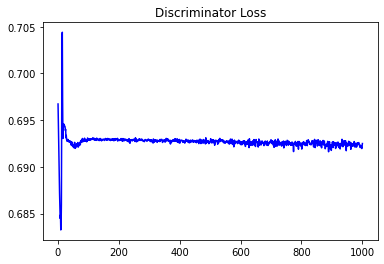

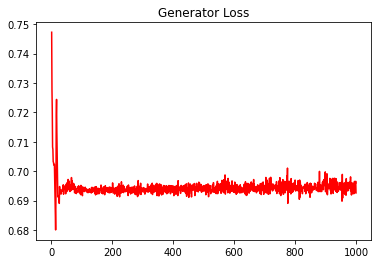

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09624997392431735


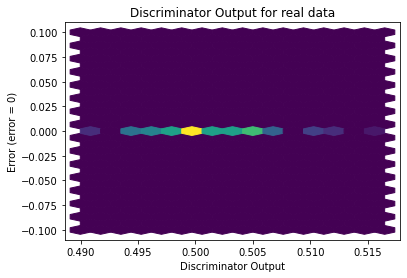

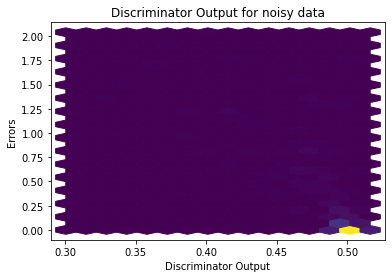

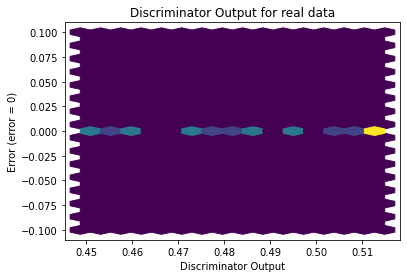

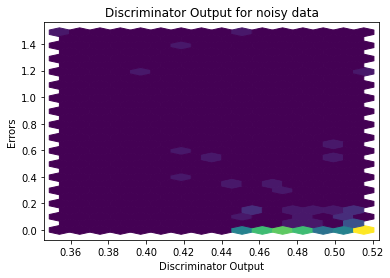

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


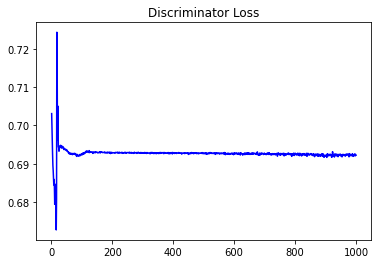

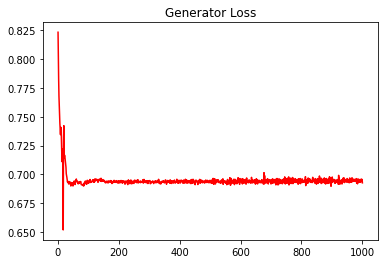

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13367466408878262


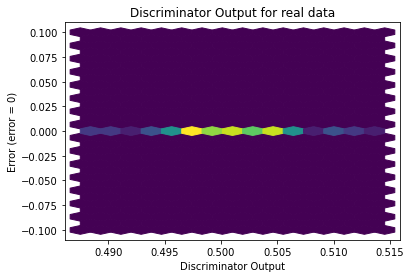

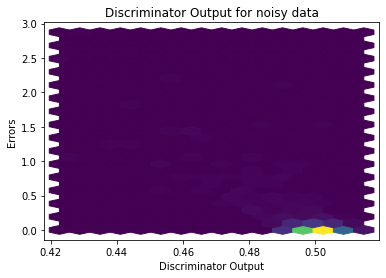

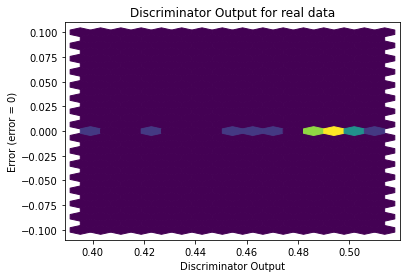

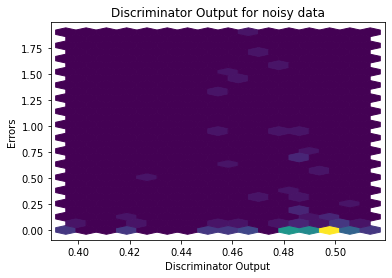

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6600]], requires_grad=True)
